In [1]:
import matplotlib.pyplot as plt
import numpy as np

print("Setup complete")


Setup complete


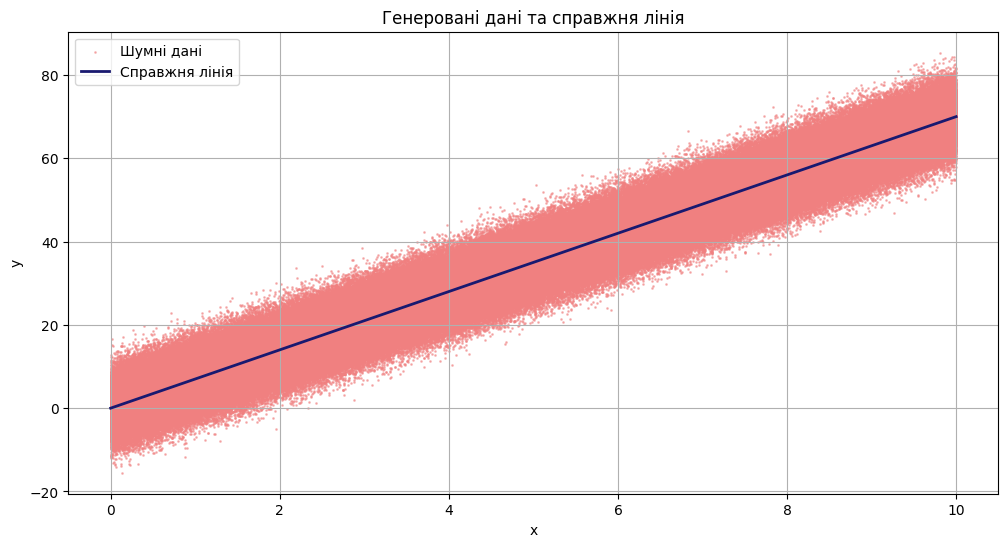

In [2]:
# Параметри моделі
slope_true = 7
intercept_true = 0
num_points = 1_000_000

# Генерація даних
x_values = np.linspace(0, 10, num_points)
noise = np.random.normal(0, 4, num_points)
y_values = slope_true * x_values + intercept_true + noise

# Візуалізація даних
plt.figure(figsize=(12, 6))
plt.scatter(x_values, y_values, color='lightcoral', s=1, alpha=0.5, label='Шумні дані')
plt.plot(x_values, slope_true * x_values + intercept_true, color='midnightblue', linewidth=2, label='Справжня лінія')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Генеровані дані та справжня лінія')
plt.legend()
plt.grid(True)
plt.show()


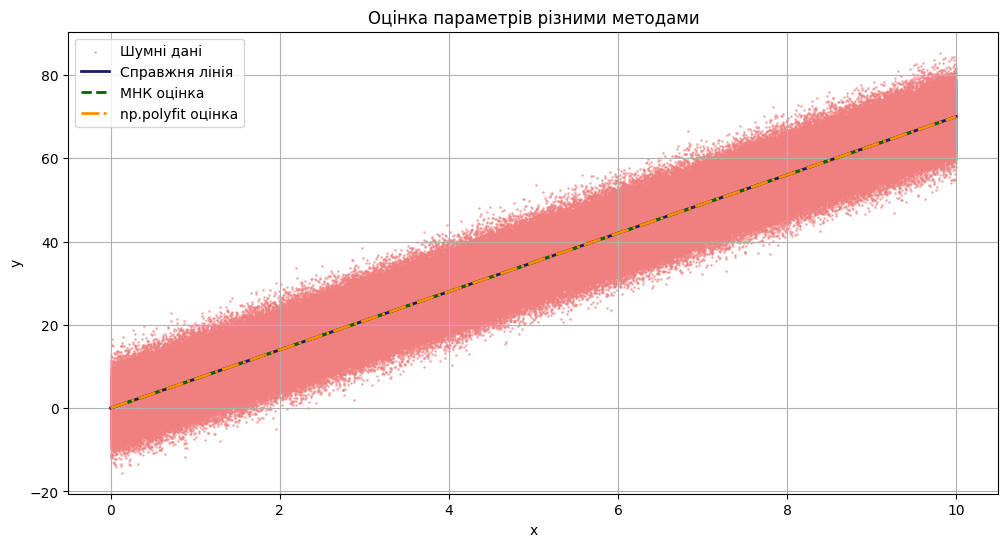

Параметри справжньої лінії:
slope_true = 7
intercept_true = 0

Оцінки параметрів методом найменших квадратів:
slope_est = 6.998098515859386
intercept_est = 0.004603053069718182

Оцінки параметрів за допомогою np.polyfit:
slope_polyfit = 6.998098515859409
intercept_polyfit = 0.004603053069703889


In [3]:
# Метод найменших квадратів
def least_squares(x, y):
    n = len(x)
    sum_x, sum_y = np.sum(x), np.sum(y)
    sum_xy, sum_xx = np.sum(x * y), np.sum(x * x)

    slope_est = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    intercept_est = (sum_y - slope_est * sum_x) / n

    return slope_est, intercept_est


# Оцінка параметрів
slope_est, intercept_est = least_squares(x_values, y_values)
coeffs_polyfit = np.polyfit(x_values, y_values, 1)
slope_polyfit, intercept_polyfit = coeffs_polyfit

# Візуалізація оцінок
plt.figure(figsize=(12, 6))
plt.scatter(x_values, y_values, color='lightcoral', s=1, alpha=0.5, label='Шумні дані')
plt.plot(x_values, slope_true * x_values + intercept_true, color='midnightblue', linewidth=2, label='Справжня лінія')
plt.plot(x_values, slope_est * x_values + intercept_est, color='darkgreen', linestyle='--', linewidth=2,
         label='МНК оцінка')
plt.plot(x_values, slope_polyfit * x_values + intercept_polyfit, color='darkorange', linestyle='-.', linewidth=2,
         label='np.polyfit оцінка')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Оцінка параметрів різними методами')
plt.legend()
plt.grid(True)
plt.show()

print("Параметри справжньої лінії:")
print("slope_true =", slope_true)
print("intercept_true =", intercept_true)
print()
print("Оцінки параметрів методом найменших квадратів:")
print("slope_est =", slope_est)
print("intercept_est =", intercept_est)
print()
print("Оцінки параметрів за допомогою np.polyfit:")
print("slope_polyfit =", slope_polyfit)
print("intercept_polyfit =", intercept_polyfit)


6.365072155033544 4.19383105216592


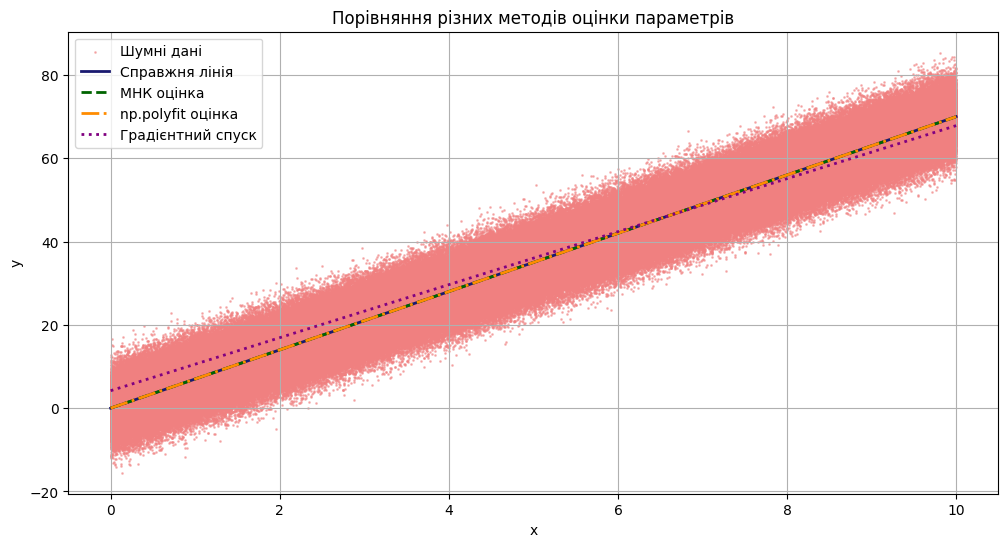

In [4]:
# Градієнтний спуск
def gradient_descent(x, y, lr, iterations):
    slope, intercept = 7, 7
    n = len(x)

    if iterations <= 0 or lr <= 0:
        raise ValueError("learning_rate та n_iter повинні бути більше 0")

    for _ in range(iterations):
        y_pred = slope * x + intercept
        gradient_slope = (-2 / n) * np.sum(x * (y - y_pred))
        gradient_intercept = (-2 / n) * np.sum(y - y_pred)
        slope -= lr * gradient_slope
        intercept -= lr * gradient_intercept

    return slope, intercept


# Параметри градієнтного спуску
lr = 0.01
iterations = 100

# Оцінка параметрів за допомогою градієнтного спуску
slope_gd, intercept_gd = gradient_descent(x_values, y_values, lr, iterations)
print(slope_gd, intercept_gd)

# Візуалізація оцінок
plt.figure(figsize=(12, 6))
plt.scatter(x_values, y_values, color='lightcoral', s=1, alpha=0.5, label='Шумні дані')
plt.plot(x_values, slope_true * x_values + intercept_true, color='midnightblue', linewidth=2, label='Справжня лінія')
plt.plot(x_values, slope_est * x_values + intercept_est, color='darkgreen', linestyle='--', linewidth=2,
         label='МНК оцінка')
plt.plot(x_values, slope_polyfit * x_values + intercept_polyfit, color='darkorange', linestyle='-.', linewidth=2,
         label='np.polyfit оцінка')
plt.plot(x_values, slope_gd * x_values + intercept_gd, color='purple', linestyle=':', linewidth=2,
         label='Градієнтний спуск')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння різних методів оцінки параметрів')
plt.legend()
plt.grid(True)
plt.show()


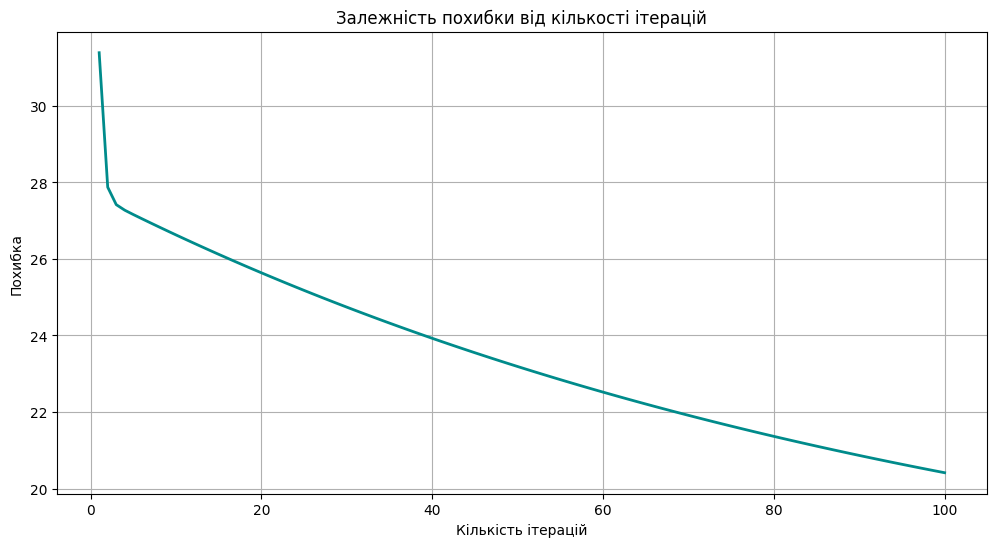

In [5]:
# Функція втрат для градієнтного спуску
def loss(x, y, slope, intercept):
    y_pred = slope * x + intercept
    return np.mean((y_pred - y) ** 2)


# Графік залежності похибки від кількості ітерацій
losses = []
iterations_range = range(1, iterations + 1)
for i in iterations_range:
    slope_gd, intercept_gd = gradient_descent(x_values, y_values, lr, i)
    error = loss(x_values, y_values, slope_gd, intercept_gd)
    losses.append(error)

plt.figure(figsize=(12, 6))
plt.plot(iterations_range, losses, color='darkcyan', linewidth=2)
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.grid(True)
plt.show()
